Question 1:

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_46008\3798131411.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_ftse_df.fillna(method='ffill', inplace=True)


              Adj Close  Average House Price  house_returns  ftse_returns
Date                                                                     
1991-02-01  2380.899902         53496.798746       0.008390      0.097037
1991-03-01  2456.500000         52892.861606      -0.011289      0.031753
1991-04-01  2486.199951         53677.435270       0.014833      0.012090
1991-05-01  2499.500000         54385.726747       0.013195      0.005350
1991-07-01  2588.800049         54541.121263       0.002857      0.035727
slope: 0.11009020857106064, intercept: 0.005561212797840313
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2558
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.614
Time:                      

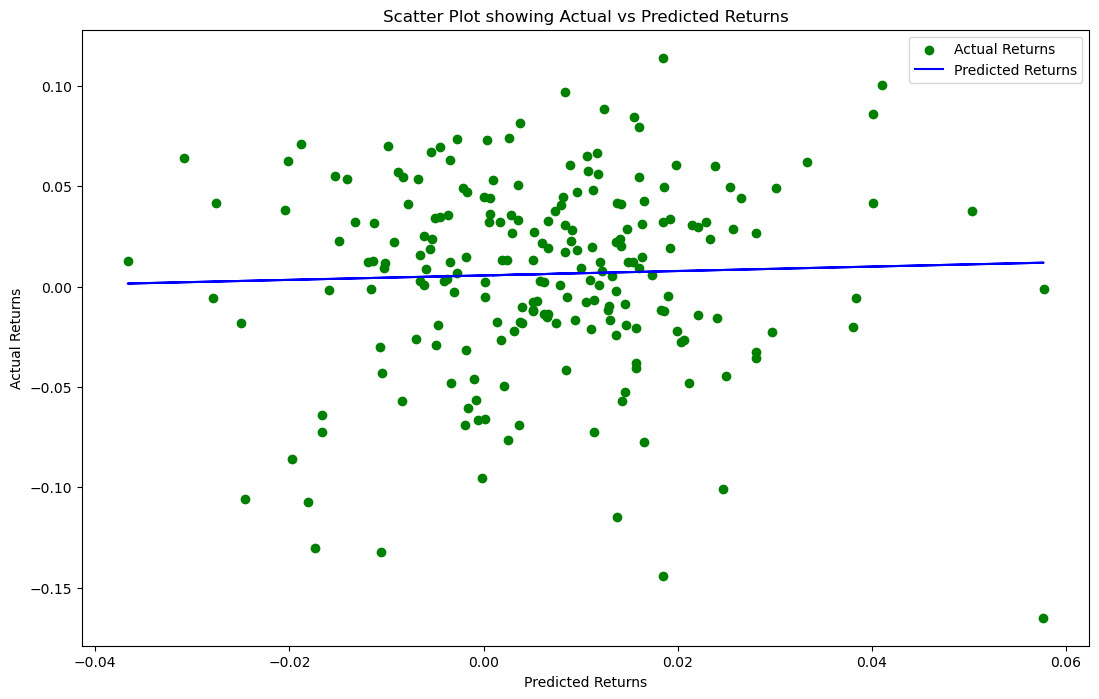

R2 value: 0.0012164661664135767


In [12]:
# to use read_excel function
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt
# to utilize correlation function
import numpy as np
# to utilize the fit (model) function
from sklearn.linear_model import LinearRegression as lr

import statsmodels.api as st

# storing data from data source into respective data frames (both metadata and original data) 
ftse100_df = pd.read_csv('data/FTSE100.csv')
houseprices_df = pd.read_excel('data/Monthly.xls')

ftse100_df['Date'] = pd.to_datetime(ftse100_df['Date'])
houseprices_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
houseprices_df['Date'] = pd.to_datetime(houseprices_df['Date'])
ftse100_df = ftse100_df.drop(columns=['Open', 'Close', 'High', 'Low', 'Volume'])
houseprices_df= houseprices_df.drop(columns=['Seasonally Adjusted Index', 'Monthly % Change (SA)',  'Year % Change', 'Latest 3 months on previous 3 months', 'INDEX Q1 1993=100'])

houseprices_df.set_index('Date', inplace=True)
houseprices_df = houseprices_df[houseprices_df.index <= '2016']
house_ftse_df = pd.merge(ftse100_df, houseprices_df, on='Date')
house_ftse_df.set_index('Date', inplace=True)
house_ftse_df.sort_index(inplace=True)


# print(ftse100_df.head(5))

house_ftse_df.fillna(method='ffill', inplace=True)
# print(house_ftse_df.isnull ().sum())

# define the dependent and independent variables
# taking the last price of each month after resampling
# dp_var = ftse100_df['Adj Close'].resample('M').last()
house_ftse_df['house_returns'] = house_ftse_df['Average House Price'].pct_change()
house_ftse_df['ftse_returns'] = house_ftse_df['Adj Close'].pct_change()

house_ftse_df.dropna(inplace=True)

print(house_ftse_df.head(5))

# Y for the dependent variable
Y = house_ftse_df['ftse_returns'].values
# X for the explanatory variable
X = house_ftse_df['house_returns'].values.reshape(-1,1)

# fitting the model
model = lr()
model.fit(X,Y)

# get coefficients
slope = model.coef_[0]
intercept = model.intercept_
predictions = model.predict(X)

print(f"slope: {slope}, intercept: {intercept}")

X_with_const = st.add_constant(X)
model_stats = st.OLS(Y, X_with_const).fit()

print(model_stats.summary())


# graph configuration
plt.figure(figsize=(13,8))
plt.scatter(X,Y, color='green', label='Actual Returns')
plt.plot(X, predictions, color='blue', label='Predicted Returns')
plt.title("Scatter Plot showing Actual vs Predicted Returns")
plt.ylabel("Actual Returns")
plt.xlabel("Predicted Returns")
plt.legend()
plt.show()


# get r value
r_squared = model.score(X, Y)
print(f"R2 value: {r_squared}")



# # exp_var = houseprices_df['Average House Price'].resample('M').last()
# m_returns_house = exp_var.pct_change().dropna()

# X= st.add_constant(exp_var)

# model = st.OLS(dp_var, exp_var).fit()

# print(model.summary)





Question 2:

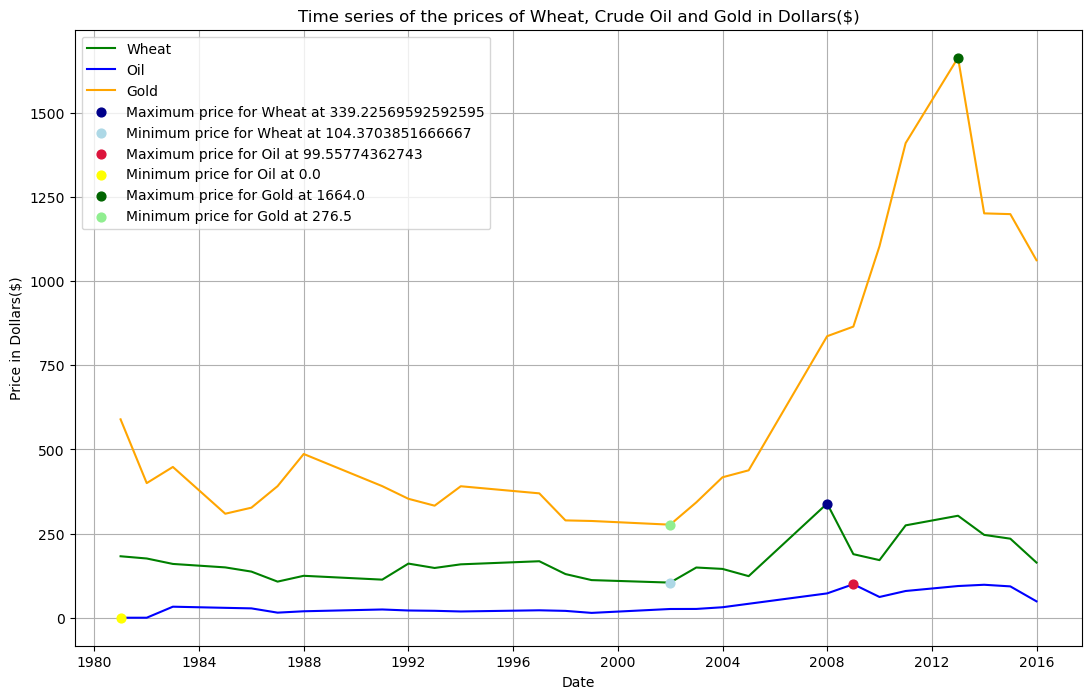

In [49]:
# to get datasets from quandl
import quandl as qdl
# to utilize the plot function 
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# providing api key to allow connections to quandl
# qdl.ApiConfig.api_key = 'my-api-key'

# specifying the exact datasets to receive from quandl
# wheat_prices = qdl.get('COM/PWHEAMT_USD')
# oil_prices = qdl.get('WGEC/WLD_CRUDE_WTI')
# gold_prices = qdl.get('BUNDESBANK/BBK01_WT5511')

# reading data from csv file
wheat_prices = pd.read_csv('data/wheat.csv', parse_dates=['Date'])
oil_prices = pd.read_csv('data/crude-oil.csv', parse_dates=['Date'])
gold_prices = pd.read_csv('data/gold.csv', parse_dates=['Date'])

# synchronizing the dates for the 3 datasets 
merged_prices = pd.merge(wheat_prices,oil_prices, on=['Date'],suffixes=('_wheat','_oil'))
merged_prices = pd.merge(merged_prices, gold_prices, on=['Date'])

merged_prices = merged_prices.set_index('Date')

# replacing the auto generated column names with clear ones
merged_prices.rename(columns={'Value_wheat': 'Wheat_price', 'Value_oil':'Oil_price', 'Value':'Gold_price'}, inplace=True)

# configuring the time series graph
plt.figure(figsize=(13,8))
plt.plot(merged_prices.index, merged_prices['Wheat_price'], label="Wheat", color="green")
plt.plot(merged_prices.index, merged_prices['Oil_price'], label="Oil", color="blue")
plt.plot(merged_prices.index, merged_prices['Gold_price'], label="Gold", color="Orange")

# minimum and maximum colors to uniquely identify the maximum and minimum points for wheat, oil and gold
colors = {
    'Wheat_price': ['lightblue','darkblue'],
    'Oil_price': ['yellow','crimson'],
    'Gold_price': ['lightgreen','darkgreen']
}
# we use these alternative titles in the legend description 
clean_price_titles = {
    'Wheat_price': 'Wheat',
    'Oil_price': 'Oil',
    'Gold_price': 'Gold'
}
# interate through the columns to mark the highest and lowest points for each of them
for column in merged_prices.columns:
    max_value = merged_prices[column].max()
    max_index = merged_prices[column].idxmax()
    plt.scatter(max_index, max_value, color=colors[column][1], s=40, zorder=3, label=f'Maximum price for {clean_price_titles[column]} at {float(max_value)}')
    min_value = merged_prices[column].min()
    min_index = merged_prices[column].idxmin()
    plt.scatter(min_index, min_value, color=colors[column][0], s=40, zorder=3, label=f'Minimum price for {clean_price_titles[column]} at {float(min_value)}')

# graph configuration continued
plt.title("Time series of the prices of Wheat, Crude Oil and Gold in Dollars($)")
plt.xlabel('Date')
plt.ylabel('Price in Dollars($)')
plt.grid(True)
plt.legend()
plt.show()

Question 3:

In [50]:
# to utilize the read_excel function
import pandas as pd
# to utilize the tabulate formatter for tables
from tabulate import tabulate as tb

# read data from file
c02_df = pd.read_excel('data/C02_emissions.xls', sheet_name='Data', skiprows=3)
# drop unnecessary columns 
c02_filtered_df = c02_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name'])

# change to data frame format to long version (Year shown as single column)
c02_melted_df = c02_filtered_df.melt(id_vars=['Country Code'], var_name='Year', value_name='C02 Emission')
# convert the date and filter the data frame
c02_melted_df['Year'] = pd.to_datetime(c02_melted_df['Year'], format='%Y')
c02_melted_df = c02_melted_df[c02_melted_df['Year'].dt.year == 2010]
# drop missing values 
c02_melted_df.dropna()
# calculate summary statistics
c02_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Value": [
        round(c02_melted_df['C02 Emission'].mean(),2),
        round(c02_melted_df['C02 Emission'].median(),2),
        round(c02_melted_df['C02 Emission'].std(),2),
        round(c02_melted_df['C02 Emission'].quantile(0.05),2),
        round(c02_melted_df['C02 Emission'].quantile(0.25),2),
        round(c02_melted_df['C02 Emission'].quantile(0.75),2),
        round(c02_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}
# convert dictionary to data frame
c02_summary_df= pd.DataFrame(c02_summary)
# print table 
print("Table showing C02 emissions (metric tons per capita) \n summary statistics for all countries for the year 2010")
print(tb(c02_summary_df, headers='keys', tablefmt='pretty'))

# read data from file
school_df = pd.read_excel('data/school_enrollment.xls', sheet_name='Data', skiprows=3)
# drop unnecessary columns 
school_filtered_df = school_df.drop(columns=['Indicator Name', 'Indicator Code'])

# change to data frame format to long version (Year shown as single column)
school_melted_df = school_filtered_df.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='C02 Emission')
# convert the date and filter the data frame
school_melted_df['Year'] = pd.to_datetime(school_melted_df['Year'], format='%Y')
school_melted_df = school_melted_df[school_melted_df['Year'].dt.year == 2010]

# drop missing values 
school_melted_df.dropna()

# calculate summary statistics
school_stats_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Value": [
        round(school_melted_df['C02 Emission'].mean(),2),
        round(school_melted_df['C02 Emission'].median(),2),
        round(school_melted_df['C02 Emission'].std(),2),
        round(school_melted_df['C02 Emission'].quantile(0.05),2),
        round(school_melted_df['C02 Emission'].quantile(0.25),2),
        round(school_melted_df['C02 Emission'].quantile(0.75),2),
        round(school_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}

# convert dictionary to data frame
school_stats_summary_df= pd.DataFrame(school_stats_summary)
# print table 
print("Table showing School enrollments (% net) \n summary statistics for all countries for the year 2010")
print(tb(school_stats_summary_df, headers='keys', tablefmt='pretty'))

Table showing C02 emissions (metric tons per capita) 
 summary statistics for all countries for the year 2010
+---+--------------------+-------+
|   |     Statistic      | Value |
+---+--------------------+-------+
| 0 |        Mean        | 4.41  |
| 1 |       Median       | 2.67  |
| 2 | Standard Deviation | 5.17  |
| 3 |   5th percentile   | 0.11  |
| 4 |  25th Percentile   | 0.76  |
| 5 |  75th Percentile   |  6.2  |
| 6 |  95th Percentile   | 15.17 |
+---+--------------------+-------+
Table showing School enrollments (% net) 
 summary statistics for all countries for the year 2010
+---+--------------------+-------+
|   |     Statistic      | Value |
+---+--------------------+-------+
| 0 |        Mean        | 90.11 |
| 1 |       Median       | 92.96 |
| 2 | Standard Deviation | 9.53  |
| 3 |   5th percentile   | 66.66 |
| 4 |  25th Percentile   | 87.8  |
| 5 |  75th Percentile   | 95.93 |
| 6 |  95th Percentile   | 98.87 |
+---+--------------------+-------+


Question 4:

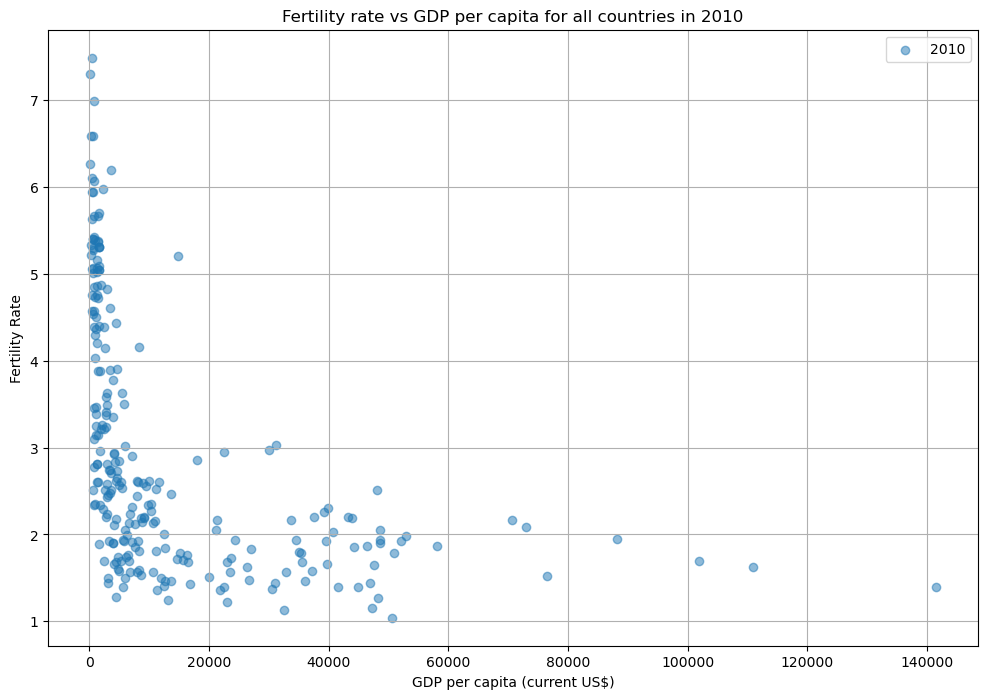

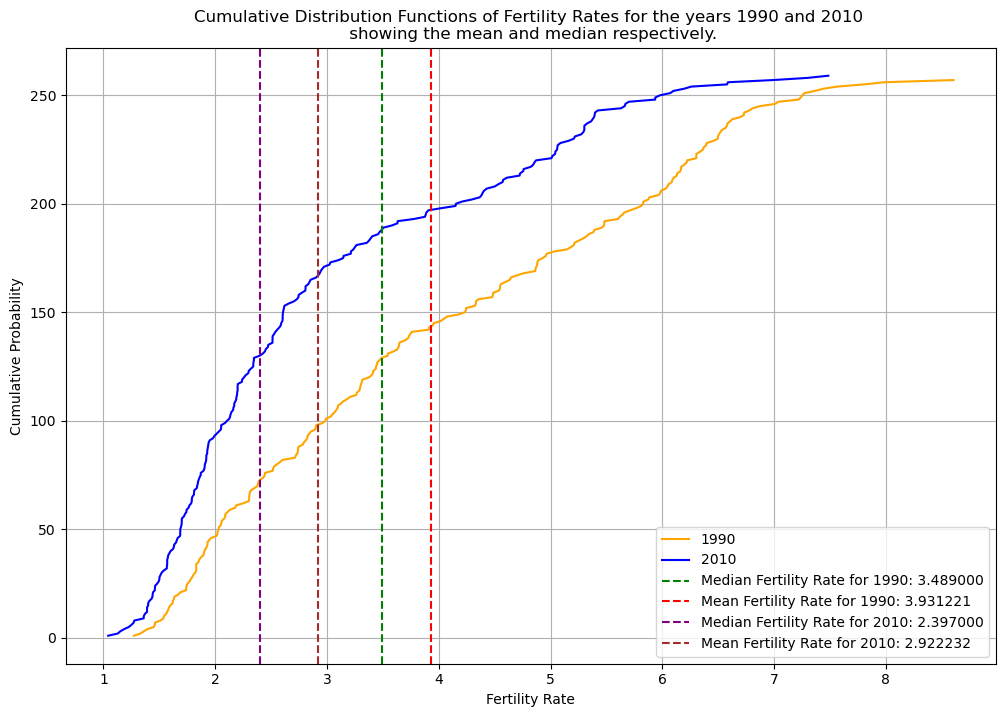

In [51]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt
# save data from file into dataframe
fertility_rate_df = pd.read_excel('data/fertility_rate.xls', sheet_name='Data', skiprows=3)
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)
# dropping unnecessary columns 
fertility_rate_df_filtered = fertility_rate_df.drop(columns=['Indicator Name','Country Name', 'Indicator Code'])
# convert data frame to long format (year as single column)
fertility_rate_df_melted = fertility_rate_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='Fertility')
# dropping unnecessary columns
gdp_data_df_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name'])
# convert data frame to long format (year as single column)
gdp_data_df_melted = gdp_data_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='GDP')

# merging the two data frames on Year column
fertility_gdp_df = pd.merge(fertility_rate_df_melted, gdp_data_df_melted, on=['Year', 'Country Code'])

fertility_gdp_df_converted = fertility_gdp_df 
# converting the date to datetime
fertility_gdp_df_converted['Year'] = pd.to_datetime(fertility_gdp_df['Year'], format='%Y')
# filtering the data frame to only 2010 records
fertility_gdp_df_2010 = fertility_gdp_df_converted[fertility_gdp_df_converted['Year'].dt.year==2010]
# configure and plot graph
plt.figure(figsize=(12,8))
plt.scatter(fertility_gdp_df_2010['GDP'], fertility_gdp_df_2010['Fertility'], alpha=0.5, label='2010')
plt.title("Fertility rate vs GDP per capita for all countries in 2010")
plt.ylabel("Fertility Rate")
plt.xlabel("GDP per capita (current US$)")
plt.grid(True)
plt.legend()
plt.show()

# preparing to calculate CDF for fertility variable for 1990 and 2010, so we drop the GDP column
fertility_gdp_df= fertility_gdp_df.drop(columns=['GDP'])
# filtering data to 1990 and 2010 data frames
fgdp_1990  = fertility_gdp_df[(fertility_gdp_df['Year'].dt.year == 1990)]
fgdp_2010  = fertility_gdp_df[(fertility_gdp_df['Year'].dt.year == 2010)]

# sorting in ascending order both years data 
fgdp_1990 = fgdp_1990.dropna()
fgdp_1990 = fgdp_1990.sort_values(by='Fertility')
fgdp_2010 = fgdp_2010.dropna()
fgdp_2010 = fgdp_2010.sort_values(by='Fertility')

# get the cummulative probability
cdf_1990 = np.arange(1, len(fgdp_1990)+1/ len(fgdp_1990))
cdf_2010 = np.arange(1, len(fgdp_2010)+1/ len(fgdp_2010))

# calculating the median and mean for 1990
median_fertililty_1990 = fgdp_1990['Fertility'].median()
mean_fertility_1990 = fgdp_1990['Fertility'].mean()
# calculating the median and mean for 2010
median_fertililty_2010 = fgdp_2010['Fertility'].median()
mean_fertility_2010 = fgdp_2010['Fertility'].mean()

# configure and plot graph
plt.figure(figsize=(12,8))
plt.plot(fgdp_1990['Fertility'], cdf_1990, color='orange', label='1990')
plt.plot(fgdp_2010['Fertility'], cdf_2010, color='blue', label='2010')
plt.axvline(median_fertililty_1990, color='green', linestyle='--', label=f'Median Fertility Rate for 1990: {median_fertililty_1990:f}')
plt.axvline(mean_fertility_1990, color='red', linestyle='--', label=f'Mean Fertility Rate for 1990: {mean_fertility_1990:f}')
plt.axvline(median_fertililty_2010, color='purple', linestyle='--', label=f'Median Fertility Rate for 2010: {median_fertililty_2010:f}')
plt.axvline(mean_fertility_2010, color='brown', linestyle='--', label=f'Mean Fertility Rate for 2010: {mean_fertility_2010:f}')
plt.title("Cumulative Distribution Functions of Fertility Rates for the years 1990 and 2010 \n showing the mean and median respectively.")
plt.xlabel('Fertility Rate')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

Question 5:

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


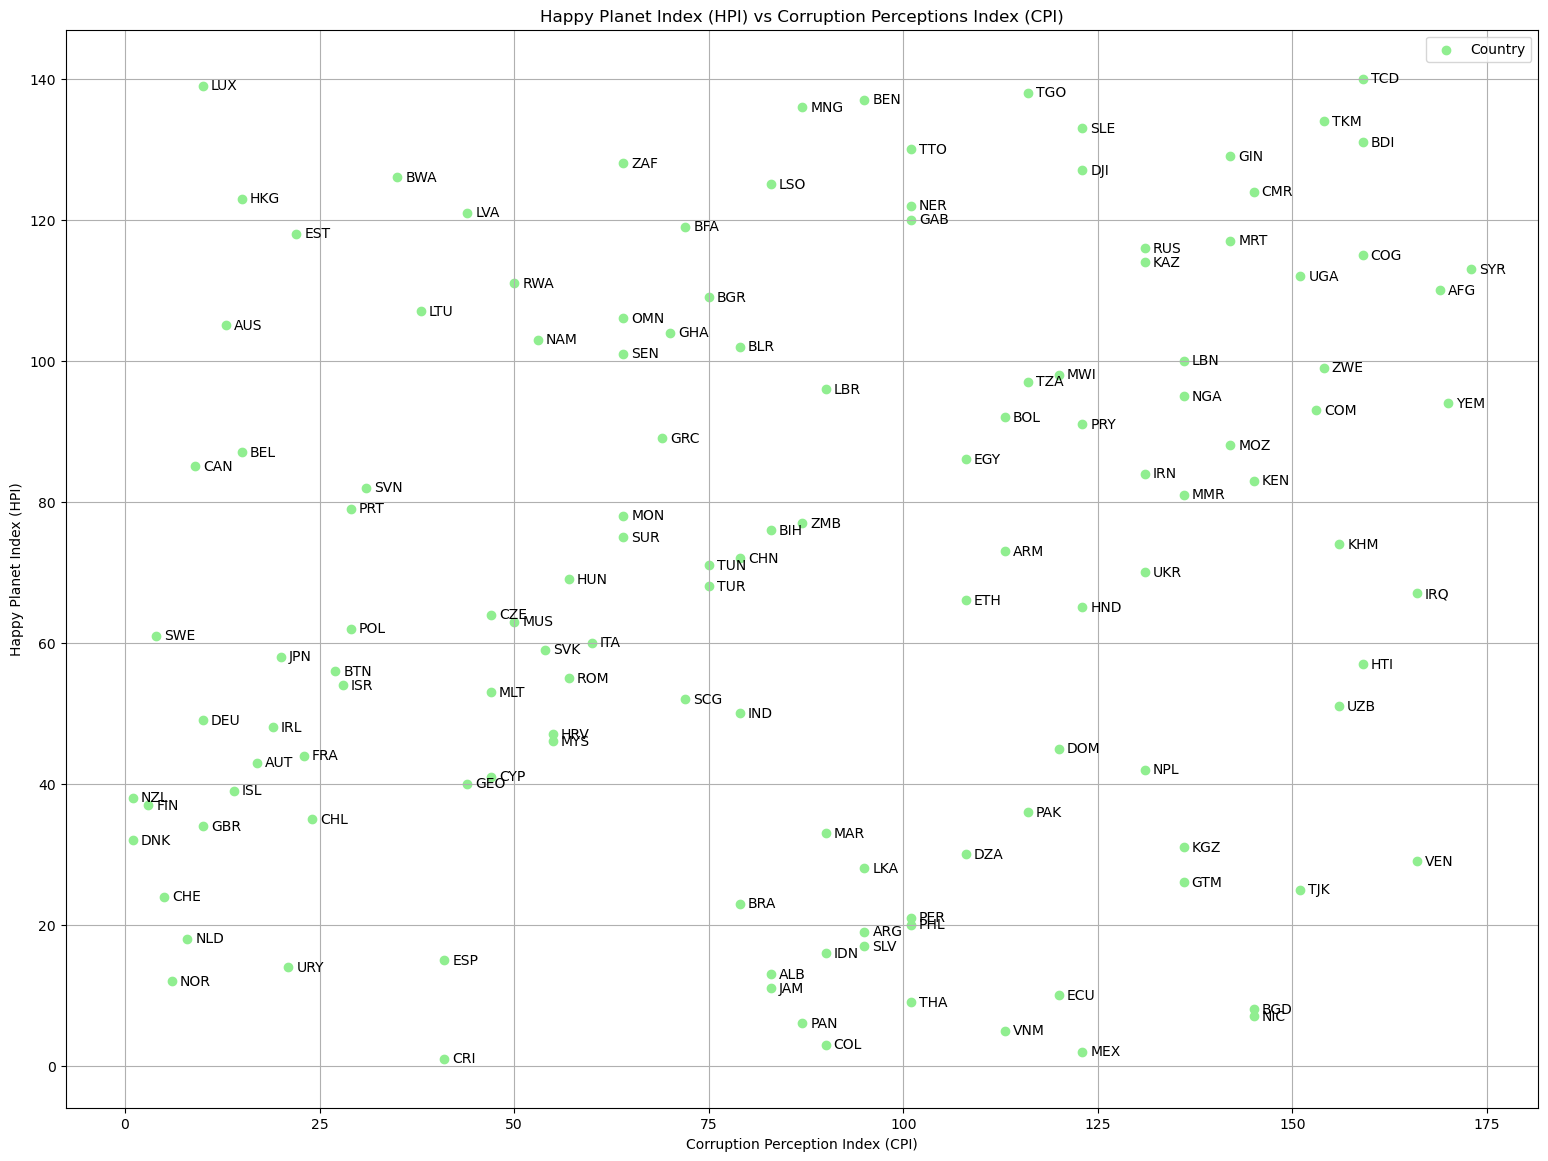

In [52]:
# to utilize the read_excel function
import pandas as pd
# to configure and plot graphs
import matplotlib.pyplot as plt
# read and store data from files into data frame
cpi_df = pd.read_excel('data/CPI_results.xlsx', sheet_name='CPI 2015-2016', usecols='A,B,C,F')
hpi_df  = pd.read_excel('data/hpi-data.xlsx', sheet_name='Rank order', usecols='B,C,J', skiprows=6)
# merge the two data frames on country
hpi_cpi_df = pd.merge(hpi_df, cpi_df,on=['Country'])
# configure and plot graph
plt.figure(figsize=(19,14))
plt.title("Happy Planet Index (HPI) vs Corruption Perceptions Index (CPI)")
plt.scatter( hpi_cpi_df['CPI 2016 Rank'], hpi_cpi_df['HPI Rank'], marker='o', color='lightgreen', label="Country")
for index, row in hpi_cpi_df.iterrows():
    plt.annotate(row['WB Code'], ( row['CPI 2016 Rank'],row['HPI Rank']), textcoords="offset pixels", xytext=(8,-4), ha='left', fontsize=10)
plt.xlabel("Corruption Perception Index (CPI)")
plt.ylabel("Happy Planet Index (HPI)")
plt.grid(True)
plt.legend()
plt.show()
